<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Actividad_Semanal_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 7 Regresiones y K means
# Linear Models


**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>
**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 9 de Noviembre de 2022

## Notebook 1 . Regresión

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
# Para omitir los mensajes de warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

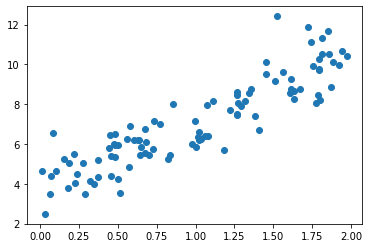

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

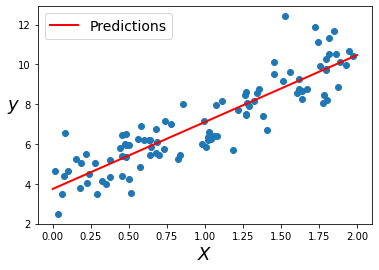

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

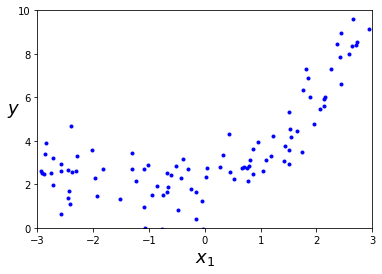

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

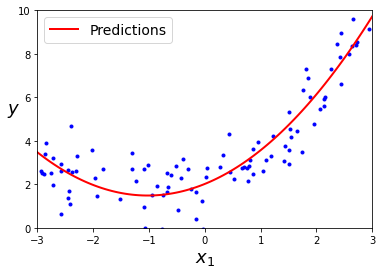

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

**Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
2. Regresión Lineal.
3. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
4. Regresión Polinomial.
5. Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
6. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
7. Finalmente grafica :

        -> MAE (de los cuatro métodos)
        -> R2 (de los cuatro métodos)

8. xplica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


**1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
from sklearn.model_selection import train_test_split

# Definimos los conjuntos de entrenamiento y prueba con una partición de 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [26]:
print("Tamaño base entrenamiento:",len(X_train))
print("Tamaño base prueba:",len(X_test))

Tamaño base entrenamiento: 800
Tamaño base prueba: 200


In [27]:
y_train.describe

<bound method NDFrame.describe of 382    36.363556
994    26.569888
982    25.169406
47     61.093235
521    38.634483
         ...    
767    29.205524
72     53.388272
908    28.591356
235    46.130645
37     54.902748
Name: Manufacturing Cost, Length: 800, dtype: float64>

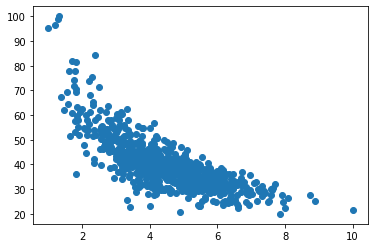

In [28]:
plt.scatter(X_train, y_train);

**2. Regresión Lineal.**

In [29]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

**3. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [30]:
linear_reg.coef_, linear_reg.intercept_

(array([-6.04244726]), 67.01306355970974)

Ecuación del modelo generado

$\hat{y} = -6.05X +67.19$

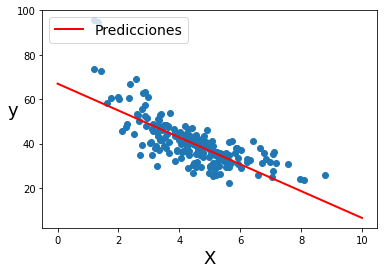

In [31]:
# Visualización del modelo generado
X_fit = np.linspace(0, 10, 200)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score

# Predicción datos prueba
y_pred_lin=linear_reg.predict(X_test)

MAE_lin=metrics.mean_absolute_error(y_test, y_pred_lin)
RMSE_lin=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
R2_lin=r2_score(y_test, y_pred_lin)

# Errores
print('Error medio Absoluto (MAE):', MAE_lin)
print('Root Mean Squared Error:', RMSE_lin)
print('r2_score',R2_lin)

Error medio Absoluto (MAE): 5.1019416976357705
Root Mean Squared Error: 7.155779808745889
r2_score 0.5610235000809491


**4. Regresión Polinomial.**

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [34]:
lin_reg_pol = LinearRegression(fit_intercept=True)
lin_reg_pol.fit(X_poly_train, y_train)

LinearRegression()

**5. Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [35]:
lin_reg_pol.coef_, lin_reg_pol.intercept_

(array([-16.50723558,   1.13583147]), 89.08376006195618)

Ecuación del modelo generado

$y = - 16.63X + 1.15X^2 + 89.45$

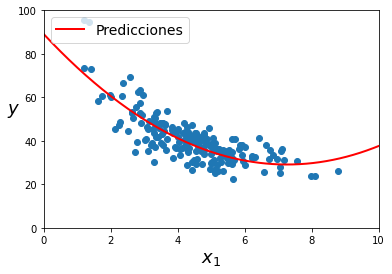

In [36]:
X_new=np.linspace(0, 10, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg_pol.predict(X_new_poly)

plt.scatter(X_test, y_test)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [37]:
# Predicción datos prueba
X_test_poly = poly_features.transform(X_test)
y_pred_pol=lin_reg_pol.predict(X_test_poly)

MAE_pol=metrics.mean_absolute_error(y_test, y_pred_pol)
RMSE_pol=np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol))
R2_pol=r2_score(y_test, y_pred_pol)

# Errores
print('Error medio Absoluto (MAE):', MAE_pol)
print('Root Mean Squared Error:', RMSE_pol)
print('r2_score',R2_pol)

Error medio Absoluto (MAE): 4.681389755325275
Root Mean Squared Error: 6.199743070239553
r2_score 0.6704853571719696


**6. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

**Modelo Ridge**

In [38]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [39]:
ridge_reg.coef_, ridge_reg.intercept_

(array([-6.03819131]), 66.99400595374111)

Ecuación del modelo generado

$\hat{y} = -6.05X +67.17$

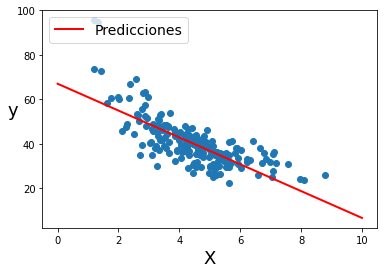

In [40]:
# Visualización del modelo generado
X_fit = np.linspace(0, 10, 200)
y_fit = ridge_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [41]:
# Predicción datos prueba
y_pred_ridge=ridge_reg.predict(X_test)

MAE_ridge=metrics.mean_absolute_error(y_test, y_pred_ridge)
RMSE_ridge=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
R2_ridge=r2_score(y_test, y_pred_ridge)

# Errores
print('Error medio Absoluto (MAE):', MAE_ridge)
print('Root Mean Squared Error:', RMSE_ridge)
print('r2_score',R2_ridge)

Error medio Absoluto (MAE): 5.1014179146653795
Root Mean Squared Error: 7.155734963239849
r2_score 0.5610290022238652


**Modelo Lasso**

In [42]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [43]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-5.47857595]), 64.48812123765603)

Ecuación del modelo generado

$\hat{y} = -5.49X +64.67$

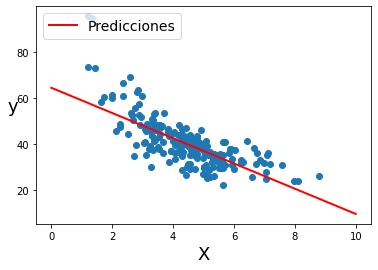

In [44]:
# Visualización del modelo generado
X_fit = np.linspace(0, 10, 200)
y_fit = lasso_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [45]:
# Predicción datos prueba
y_pred_lasso=lasso_reg.predict(X_test)

MAE_lasso=metrics.mean_absolute_error(y_test, y_pred_lasso)
RMSE_lasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
R2_lasso=r2_score(y_test, y_pred_lasso)

# Errores
print('Error medio Absoluto (MAE):', MAE_lasso)
print('Root Mean Squared Error:', RMSE_lasso)
print('r2_score',R2_lasso)

Error medio Absoluto (MAE): 5.054612601269739
Root Mean Squared Error: 7.1899971968749545
r2_score 0.5568152817241709


**7. Finalmente grafica :**

        -> MAE (de los cuatro métodos)
        -> R2 (de los cuatro métodos)

In [46]:
dic={"MAE":[MAE_lin,MAE_pol,MAE_ridge,MAE_lasso],"RMSE":[RMSE_lin,RMSE_pol,RMSE_ridge,RMSE_lasso],"R2":[R2_lin,R2_pol,R2_ridge,R2_lasso]}
index="Lineal","Polinomial","Ridge Reg","Lasso Reg"

Metricas=pd.DataFrame(data=dic,index = index)
Metricas

,MAE,RMSE,R2
Lineal,5.101942,7.155780,0.561024
Polinomial,4.681390,6.199743,0.670485
Ridge Reg,5.101418,7.155735,0.561029
Lasso Reg,5.054613,7.189997,0.556815


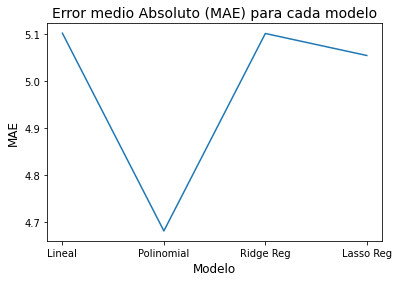

In [47]:
plt.plot(Metricas.MAE)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("MAE", rotation=90, fontsize=12)
plt.title("Error medio Absoluto (MAE) para cada modelo", fontsize=14);

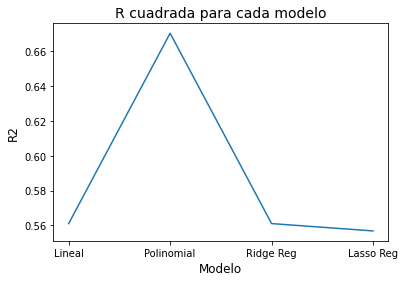

In [48]:
plt.plot(Metricas.R2)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("R2", rotation=90, fontsize=12)
plt.title("R cuadrada para cada modelo", fontsize=14);

**8. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

In [49]:
Metricas

,MAE,RMSE,R2
Lineal,5.101942,7.155780,0.561024
Polinomial,4.681390,6.199743,0.670485
Ridge Reg,5.101418,7.155735,0.561029
Lasso Reg,5.054613,7.189997,0.556815


- Se utilizó un 80% de los datos para entranamiento de los modelos y el restante para prueba de los modelos.
- El modelo con el MAE y RMSE más bajo, y el R2 más alto fue el Polinomial con un MAE de 4.68, un RMSE de 6.20 y un R2 de 0.67. Las métricas para el resto de los modelos aparecen en la tabla anterior.
- Lo anterior nos dice que el modelo más recomendable para la empresa fue el Polinomial ya que tiene el error más bajo (MAE y RMSE) y explica el mayor porcentaje de la variabilidad (R2).

# Ejercicio 2. Regresión múltiple

Encuentra el mejor regresor para los datos de las casas:

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


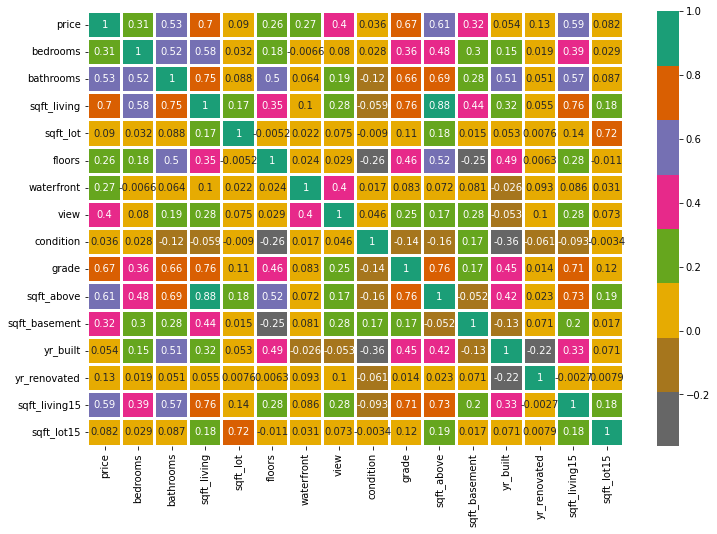

In [54]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [55]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

**1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**2. Regresión Múltiple Lineal.**

In [57]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

**3. Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.**

In [58]:
linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

**4. Regresión Múltiple Polinomial.**

Ecuación del modelo generado

Siendo:

$X1=$bedrooms<br>
$X2=$bathrooms<br>
$X3=$sqft_living<br>
$X4=$sqft_lot<br>
$X5=$floors<br>
$X6=$waterfront<br>
$X7=$view<br>
$X8=$condition<br>
$X9=$grade<br>
$X10=$sqft_above<br>
$X11=$sqft_basement<br>
$X12=$yr_built<br>
$X13=$yr_renovated<br>
$X14=$sqft_living15<br>
$X15=$sqft_lot15<br>

$\hat{y} = + (-38200.8*X1) + (0.02*X2) + (41249.32*X3) + (47.78*X4) + (13.26*X5) + (41466.14*X6) + (31691.69*X7) + (21222.14*X8) + (60.22*X9) + (29.01*X10) + (107.99*X11) + (552691.02*X12) + (119493.22*X13) + (-3550.9*X14) + (-0.55*X15) + (6151359.26)$

In [59]:
# Predicción datos prueba
y_pred_lin=linear_reg.predict(X_test)

MAE_lin=metrics.mean_absolute_error(y_test, y_pred_lin)
RMSE_lin=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
R2_lin=r2_score(y_test, y_pred_lin)

# Errores
print('Error medio Absoluto (MAE):', MAE_lin)
print('Root Mean Squared Error:', RMSE_lin)
print('r2_score',R2_lin)

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


**5. Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.**

In [60]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [61]:
lin_reg_pol = LinearRegression(fit_intercept=True)
lin_reg_pol.fit(X_poly_train, y_train)

LinearRegression()

In [62]:
lin_reg_pol.coef_, lin_reg_pol.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

Ecuación del modelo generado

Siendo:

$X1=$bedrooms<br>
$X2=$bathrooms<br>
$X3=$sqft_living<br>
$X4=$sqft_lot<br>
$X5=$floors<br>
$X6=$waterfront<br>
$X7=$view<br>
$X8=$condition<br>
$X9=$grade<br>
$X10=$sqft_above<br>
$X11=$sqft_basement<br>
$X12=$yr_built<br>
$X13=$yr_renovated<br>
$X14=$sqft_living15<br>
$X15=$sqft_lot15<br>

$\hat{y} = + (933887.69*X1) + (-27.86*X2) + (-288624.6*X3) + (-215.56*X4) + (-2953.63*X5) + (957.47*X6) + (-0.02*X7) + (-307.3*X8) + (-0.55*X9) + (-9.13*X10) + (-9631.25*X11) + (-25905.4*X12) + (-1080.63*X13) + (1.21*X14) + (-17.29*X15) + (-10.41*X1*X1) + (-14.27*X1*X2) + (-4.36*X1*X3) + (-0.06*X1*X4) + (0*X1*X5) + (-0.1*X1*X6) + (10.41*X1*X7) + (0*X1*X8) + (21609.85*X1*X9) + (20302.53*X1*X10) + (7.66*X1*X11) + (-32.04*X1*X12) + (-16052.35*X1*X13) + (183.1*X1*X14) + (-29.91*X1*X15) + (7984.69*X2*X2) + (-12.5*X2*X3) + (-9.97*X2*X4) + (-541.68*X2*X5) + (11.95*X2*X6) + (46.32*X2*X7) + (9.6*X2*X8) + (-10.13*X2*X9) + (4.62*X2*X10) + (0.1*X2*X11) + (-2.02*X2*X12) + (2.29*X2*X13) + (0.41*X2*X14) + (1.12*X2*X15) + (0.03*X3*X3) + (-1092694.11*X3*X4) + (-2074445.66*X3*X5) + (558577.22*X3*X6) + (-378.12*X3*X7) + (3999.66*X3*X8) + (7499.7*X3*X9) + (8577.36*X3*X10) + (-5245.83*X3*X11) + (-13.94*X3*X12) + (17.28*X3*X13) + (15.51*X3*X14) + (43372.95*X3*X15) + (22297.02*X4*X4) + (503.09*X4*X5) + (-0.06*X4*X6) + (4.84*X4*X7) + (13.12*X4*X8) + (2.21*X4*X9) + (-2.29*X4*X10) + (0.44*X4*X11) + (0.09*X4*X12) + (10.41*X4*X13) + (0*X4*X14) + (-131323.89*X4*X15) + (-4279.76*X5*X5) + (1036.84*X5*X6) + (-0.53*X5*X7) + (9200.03*X5*X8) + (-22.8*X5*X9) + (170.61*X5*X10) + (7339.62*X5*X11) + (-1.77*X5*X12) + (4.63*X5*X13) + (-6038.06*X5*X14) + (-307.01*X5*X15) + (-0.28*X6*X6) + (11.14*X6*X7) + (-22.76*X6*X8) + (2.69*X6*X9) + (2.28*X6*X10) + (1.28*X6*X11) + (2.59*X6*X12) + (-2.05*X6*X13) + (0.05*X6*X14) + (0*X6*X15) + (-460.85*X7*X7) + (-3954618*X7*X8) + (1098613.21*X7*X9) + (-85969.9*X7*X10) + (-34.01*X7*X11) + (-14.46*X7*X12) + (-11489.48*X7*X13) + (-5368.21*X7*X14) + (-467.08*X7*X15) + (0.22*X8*X8) + (-0.14*X8*X9) + (3828.89*X8*X10) + (14.3*X8*X11) + (-17.09*X8*X12) + (-0.25*X8*X13) + (160.3*X8*X14) + (20.74*X8*X15) + (-0.94*X9*X9) + (-2.59*X9*X10) + (-0.1*X9*X11) + (0.15*X9*X12) + (0.01*X9*X13) + (0*X9*X14) + (14441.36*X9*X15) + (-2.83*X10*X10) + (2.6*X10*X11) + (-3954586.53*X10*X12) + (-161639.25*X10*X13) + (4428.67*X10*X14) + (-0.81*X10*X15) + (17955.6*X11*X11) + (72.06*X11*X12) + (-0.05*X11*X13) + (1.16*X11*X14) + (-20.2*X11*X15) + (7366.2*X12*X12) + (-571.97*X12*X13) + (-0.51*X12*X14) + (1.18*X12*X15) + (2.59*X13*13) + (0.11*X13*14) + (23.06*X13*15) + (0.02*X14*X14) + (0*X14*X15) + (0*X15*X15) + (80233827.06)$

In [63]:
# Predicción datos prueba
X_test_poly = poly_features.transform(X_test)
y_pred_pol=lin_reg_pol.predict(X_test_poly)

MAE_pol=metrics.mean_absolute_error(y_test, y_pred_pol)
RMSE_pol=np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol))
R2_pol=r2_score(y_test, y_pred_pol)

# Errores
print('Error medio Absoluto (MAE):', MAE_pol)
print('Root Mean Squared Error:', RMSE_pol)
print('r2_score',R2_pol)

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


**6. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.**

**Modelo Ridge**

In [64]:
ridge_reg=Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [65]:
ridge_reg.coef_, ridge_reg.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([6150751.3836867]))

Ecuación del modelo generado

Siendo:

$X1=$bedrooms<br>
$X2=$bathrooms<br>
$X3=$sqft_living<br>
$X4=$sqft_lot<br>
$X5=$floors<br>
$X6=$waterfront<br>
$X7=$view<br>
$X8=$condition<br>
$X9=$grade<br>
$X10=$sqft_above<br>
$X11=$sqft_basement<br>
$X12=$yr_built<br>
$X13=$yr_renovated<br>
$X14=$sqft_living15<br>
$X15=$sqft_lot15<br>

$\hat{y} = + (-38219.23*X1) + (0.02*X2) + (41455.92*X3) + (47.81*X4) + (13.32*X5) + (41450.97*X6) + (31689.16*X7) + (21226.43*X8) + (60.21*X9) + (28.99*X10) + (108.01*X11) + (548258.33*X12) + (119470.57*X13) + (-3550.5*X14) + (-0.55*X15) + (6150751.38)$

In [66]:
# Predicción datos prueba
y_pred_ridge=ridge_reg.predict(X_test)

MAE_ridge=metrics.mean_absolute_error(y_test, y_pred_ridge)
RMSE_ridge=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
R2_ridge=r2_score(y_test, y_pred_ridge)

# Errores
print('Error medio Absoluto (MAE):', MAE_ridge)
print('Root Mean Squared Error:', RMSE_ridge)
print('r2_score',R2_ridge)

Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 232165.2426647754
r2_score 0.6578783840295006


**Modelo Lasso**

In [67]:
lasso_reg=Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [68]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-3.81995345e+04,  4.14618568e+04,  2.93480482e+02,  1.71281822e-02,
         3.16871411e+04,  5.52541108e+05,  4.12549654e+04,  2.12193902e+04,
         1.19491837e+05, -1.37708200e+02, -1.25268449e+02, -3.55085005e+03,
         1.32628460e+01,  2.90053298e+01, -5.48136075e-01]),
 array([6151280.11390041]))

Ecuación del modelo generado

Siendo:

$X1=$bedrooms<br>
$X2=$bathrooms<br>
$X3=$sqft_living<br>
$X4=$sqft_lot<br>
$X5=$floors<br>
$X6=$waterfront<br>
$X7=$view<br>
$X8=$condition<br>
$X9=$grade<br>
$X10=$sqft_above<br>
$X11=$sqft_basement<br>
$X12=$yr_built<br>
$X13=$yr_renovated<br>
$X14=$sqft_living15<br>
$X15=$sqft_lot15<br>

$\hat{y} = + (-38219.23*X1) + (0.02*X2) + (41455.92*X3) + (47.81*X4) + (13.32*X5) + (41450.97*X6) + (31689.16*X7) + (21226.43*X8) + (60.21*X9) + (28.99*X10) + (108.01*X11) + (548258.33*X12) + (119470.57*X13) + (-3550.5*X14) + (-0.55*X15) + (6151280.11)$

In [69]:
# Predicción datos prueba
y_pred_lasso=lasso_reg.predict(X_test)

MAE_lasso=metrics.mean_absolute_error(y_test, y_pred_lasso)
RMSE_lasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
R2_lasso=r2_score(y_test, y_pred_lasso)

# Errores
print('Error medio Absoluto (MAE):', MAE_lasso)
print('Root Mean Squared Error:', RMSE_lasso)
print('r2_score',R2_lasso)

Error medio Absoluto (MAE): 137480.57154885164
Root Mean Squared Error: 232134.527538022
r2_score 0.6579689024340813


**7. Finalmente gráfica :**

        -> MAE (de los cuatro métodos)
        -> R2 (de los cuatro métodos)

In [70]:
dic={"MAE":[MAE_lin,MAE_pol,MAE_ridge,MAE_lasso],"RMSE":[RMSE_lin,RMSE_pol,RMSE_ridge,RMSE_lasso],"R2":[R2_lin,R2_pol,R2_ridge,R2_lasso]}
index="Lineal","Polinomial","Ridge Reg","Lasso Reg"

Metricas=pd.DataFrame(data=dic,index = index)
Metricas

,MAE,RMSE,R2
Lineal,137480.138827,232133.367624,0.657972
Polinomial,121314.069482,186261.285751,0.779793
Ridge Reg,137491.043394,232165.242665,0.657878
Lasso Reg,137480.571549,232134.527538,0.657969


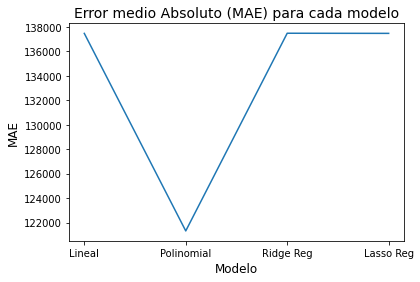

In [71]:
plt.plot(Metricas.MAE)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("MAE", rotation=90, fontsize=12)
plt.title("Error medio Absoluto (MAE) para cada modelo", fontsize=14);

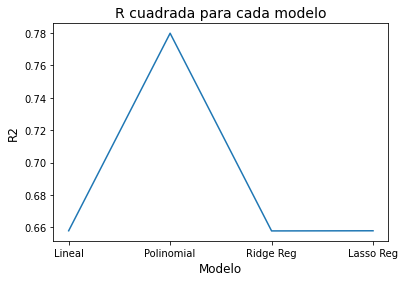

In [72]:
plt.plot(Metricas.R2)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("R2", rotation=90, fontsize=12)
plt.title("R cuadrada para cada modelo", fontsize=14);

**8. Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**

In [73]:
Metricas

,MAE,RMSE,R2
Lineal,137480.138827,232133.367624,0.657972
Polinomial,121314.069482,186261.285751,0.779793
Ridge Reg,137491.043394,232165.242665,0.657878
Lasso Reg,137480.571549,232134.527538,0.657969


- Se utilizó un 90% de los datos para entranamiento de los modelos y el restante para prueba de los modelos.
- El modelo con el MAE y RMSE más bajo, y el R2 más alto fue el Polinomial con un MAE de 4.68, un RMSE de 6.20 y un R2 de 0.67. Las métricas para el resto de los modelos aparecen en la tabla anterior.
- El método que se aproxima mejor es el Polinomial ya que tiene el error más bajo (MAE y RMSE) y explica el mayor porcentaje de la variabilidad (R2).

**9. Agrega las conclusiones**

- Para ambos conjuntos de datos el mejor modelo resulto ser el polinomial de grado 2.
- El mejor modelo va a depender del conjunto de datos, fue casualidad que sea el mismo.
- Las regularizaciones Ridge y Lasso castigan a las betas reduciendo su tamaño.